In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 19 22:57:30 2021
"""
import pandas as pd   # 引入pandas套件,使用別名 pd



real_estate=pd.read_csv(r'C:\Users\rexch\Desktop\13\real estate.csv',low_memory=False)

ask1= real_estate["district"] == "永和區"     #篩選永和區 含車位的房地 住家
ask2 = real_estate["rps01"] == "房地(土地+建物)+車位"
ask3 = real_estate["rps04"] == "住"
result=(real_estate[(ask1 & ask2 & ask3)])
result=result.sort_values(by='rps07')  #交易年先做排序 

print(type(result['rps07']))


#年份的轉換 
result['rps07'] = result['rps07'].astype(str)

result['rps07'] = (result['rps07'].str.slice(-7,-4).astype(int) + 1911).astype(str) +result['rps07'].str.slice(-4,-2) + result['rps07'].str.slice(-2, )
result['rps07'] = pd.to_datetime(result['rps07']).dt.year  #取年份 



#把單價/平方公尺 轉換為 單價/坪  並四捨五入到第一位

result['rps22']=round((result['rps22']/0.3025),1)
result=result.sort_values(by='rps22')  #排序

result=result[['district','rps01','rps02','rps07','rps21','rps22','rps27']]

rename_dic = {"district":"鄉鎮市區","rps01":"交易標的","rps02":"土地區段位置建物區段門牌","rps07":"交易年月日","rps21":"總價元","rps22":"單價/坪","rps27":"編號"}
result=result.rename(rename_dic, axis=1) 
#print(result[['單價/坪']])      #印出每筆單價 

result.to_csv(r'C:\Users\rexch\Desktop\13\serch.csv',encoding='utf-8-sig')
 #匯出要記得轉碼
 
 
 
result.columns=["鄉鎮市區","交易標的","土地區段位置建物區段門牌","交易年月日","總價元","單價/坪","編號"]
result.sum(axis = 1)


#算出每年平均
result2=result.groupby(["交易年月日"])["單價/坪"].mean()
print(result2)
result2.to_csv(r'C:\Users\rexch\Desktop\13\sum.csv',encoding='utf-8-sig')




#算出最後資訊
result=result.describe()
#print(result)
result.to_csv(r'C:\Users\rexch\Desktop\13\describe.csv',encoding='utf-8-sig') #匯出要記得轉碼






# =============================================================================
# #篩選年份，修改index
# 
# result = result['rps07'].tolist()
# 
# 
# 
# count=0
# for year in result:
#     count+=1
#     if  year >1090000:
#          print("109")     
#     elif year > 1080000 :
#          print("108")
#     elif year > 1070000 :
#          print("107")
#     elif year >1060000:
#          print("106")  
#     else :
#          print("105")   
#          
# 
# print(year)
# result = result.DataFrame(columns = '交易年 ', data = year)
# =============================================================================

<class 'pandas.core.series.Series'>
交易年月日
2016    604678.162857
2017    592715.891139
2018    665546.173585
2019    577452.933862
2020    544227.000625
Name: 單價/坪, dtype: float64


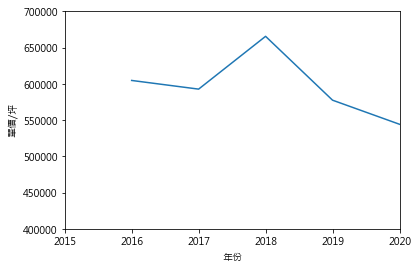

In [4]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 

#中文字型設定 
plt.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False


result2.plot()
#plt.ylim(500000, 700000)
plt.axis([2015, 2020,400000,700000])
plt.ylabel('單價/坪')
plt.xlabel('年份')




plt.show()